<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-a-Dataset" data-toc-modified-id="Generate-a-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate a Dataset</a></span></li><li><span><a href="#Compare-by-Means" data-toc-modified-id="Compare-by-Means-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare by Means</a></span></li><li><span><a href="#Compare-by-Distplots" data-toc-modified-id="Compare-by-Distplots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Compare by Distplots</a></span></li><li><span><a href="#Compare-by-Boxplots" data-toc-modified-id="Compare-by-Boxplots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compare by Boxplots</a></span></li><li><span><a href="#Compare-by-T-Tests" data-toc-modified-id="Compare-by-T-Tests-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare by T-Tests</a></span></li></ul></div>

In [1]:
# We won't use them all. It's just the header of “Mosky's lab”.
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
# Comment it.
# Or download the font from https://www.google.com/get/noto/#sans-hant.
# Consider run it if get any problem: `!rm -rf {mpl.get_cachedir()}`.
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
np.random.seed(20180701+1)

# Generate a Dataset

In [3]:
# pd.Series(...) is just like a column in excel
# norm.rvs(loc=mu, scale=sigma, size=n) === sample n from N(mu, sigma)
group_ctl = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_1 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170, scale=5, size=100))
group_exp_2 = pd.Series(name='height', data=sp.stats.norm.rvs(loc=170+2, scale=5, size=100))

In [4]:
group_ctl.head()

0    162.526543
1    176.272414
2    169.757880
3    168.861235
4    172.672516
Name: height, dtype: float64

In [5]:
group_exp_1.head()

0    180.718043
1    163.489327
2    169.421511
3    172.989371
4    166.585955
Name: height, dtype: float64

In [6]:
group_exp_2.head()

0    175.117578
1    165.693030
2    171.758333
3    170.628202
4    168.315145
Name: height, dtype: float64

# Compare by Means

In [7]:
group_ctl.describe()

count    100.000000
mean     169.612832
std        4.529428
min      158.304719
25%      167.157604
50%      169.774253
75%      172.423286
max      179.218983
Name: height, dtype: float64

In [8]:
group_exp_1.describe()

count    100.000000
mean     169.878311
std        4.629288
min      157.349978
25%      167.093234
50%      169.371563
75%      172.644362
max      181.994421
Name: height, dtype: float64

In [9]:
group_exp_2.describe()

count    100.000000
mean     171.838924
std        5.291648
min      159.956181
25%      168.275924
50%      171.847332
75%      175.261413
max      185.506297
Name: height, dtype: float64

In [10]:
group_exp_1.mean() > group_ctl.mean()

True

In [11]:
group_exp_2.mean() > group_ctl.mean()

True

# Compare by Distplots

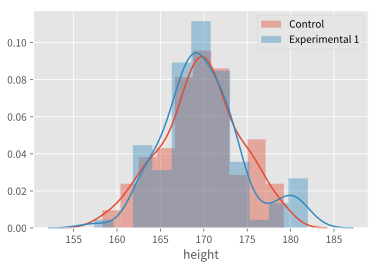

In [12]:
sns.distplot(group_ctl)
sns.distplot(group_exp_1)
plt.legend(['Control', 'Experimental 1'])

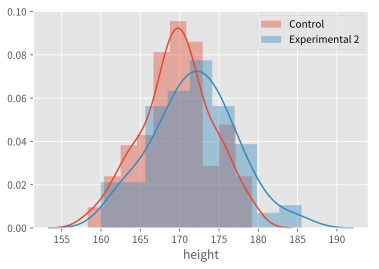

In [13]:
sns.distplot(group_ctl)
sns.distplot(group_exp_2)
plt.legend(['Control', 'Experimental 2'])

# Compare by Boxplots

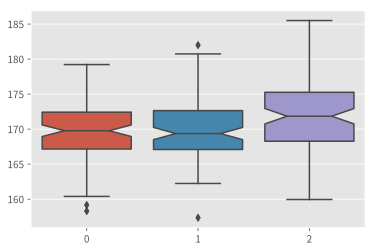

In [14]:
sns.boxplot(data=[group_ctl, group_exp_1, group_exp_2], notch=True)

* Box: $Q_1$ to $Q_3$ = 25th to 75th percentile = middle 50% of data.
* Line: the median = the 50th percentile.
* Whiskers:
    * $ Q_1 - 1.5 IQR $, where $ IQR = Q_3 - Q_1 $.
    * $ Q_3 + 1.5 IQR $.
    * = middle 99.3% if data follow a normal distribution.
* Points: out of middle 99.3% if data follow a normal distribution, may be outliers.
* Notch: $ median \pm 1.57\dfrac{IQR}{\sqrt{n}} $ = 95% confidence interval for the median.
    * The 95% confidence interval for the median also can be bootstrapped.
    * The 95% confidence interval also can be “for mean” in other plots.
    * If the notches don't overlap, may be different significantly.

# Compare by T-Tests

In [15]:
alpha = 0.05

In [16]:
r = sp.stats.ttest_ind(group_ctl, group_exp_1)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-0.4099072017185312, pvalue=0.6823171712742595)
False


In [17]:
r = sp.stats.ttest_ind(group_ctl, group_exp_2)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-3.1959130447343154, pvalue=0.001622421465212757)
True
